## Project - Seattle Airbnb Dataset  

BY Fabi Daniel

#### Introduction

The data was gotten from kaggle and it included three dataset listed below. One of the major objective of this analysis is to discover **factors** that influence the **occupancy rates** of short stay accommodations in Seattle. 
The calendar dataframe was used in analysing the occupancy rates. The listings dataframe was normalized into smaller related tables as listed below with listing_id as KEY. The Idea is to **Isolate** all the different factors into smaller tables and check relatioship with **occupancy rates**


* Listings, including full descriptions and average review score
* Reviews, including unique id for each reviewer and detailed comments
* Calendar, including listing id and the price and availability for that day


Normalized Listings
* listings_location - for locational details of the listings e.g. state, country_code etc
* listings_price - for pricing details e.g weekly price, monthly price
* listings_bedtails - for bedding details e.g no of beds
* listings_hosts - for host details e.g host url, name
* listings_review for review score e.g 



#### Acknowledgement
I downloaded from [here](https://www.kaggle.com/datasets/airbnb/seattle). However, this dataset is part of Airbnb Inside, and the original source can be found [here](http://insideairbnb.com/get-the-data.html).

In [3]:
# import all necessary modules
import numpy as np
print('numpy: {}'.format(np.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
from matplotlib import pyplot as plt
# print('matplotlib: {}'.format(matplotlib.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
%matplotlib inline

numpy: 1.23.1
pandas: 1.4.3
seaborn: 0.11.2


In [4]:
#load dataset

calendar_df = pd.read_csv('/Users/cwrealestate/Documents/GitHub/Seattle-Airbnb/Seattle Airbnb Datasets/calendar.csv')
listings_df = pd.read_csv('/Users/cwrealestate/Documents/GitHub/Seattle-Airbnb/Seattle Airbnb Datasets/listings.csv')
reviews_df = pd.read_csv('/Users/cwrealestate/Documents/GitHub/Seattle-Airbnb/Seattle Airbnb Datasets/reviews.csv')

In [5]:
# Get overview of Calendar
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
# Get info 
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


* There are **4** Columns In calendar_df, **1,393,570** observations
* ['price'] with missing values

In [7]:
# See listings dataframe
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
# Get info
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

* There are **91** columns in listings_df, **3,818** observations

In [9]:
# See reviews
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
# Get Info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


* There are **6** columns in reviews_df, **84,849** observations

### Data Assessment


In [11]:
listings_df.sample(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
829,1970725,https://www.airbnb.com/rooms/1970725,20160104002432,2016-01-04,"Private entrance, great location",Eco-friendly green built home that's only a fe...,NaN,Eco-friendly green built home that's only a fe...,none,Markets: 2 blocks to Trader Joes and the Centr...,...,9.0,f,NaN,WASHINGTON,f,strict,t,t,1,2.19
1388,1857141,https://www.airbnb.com/rooms/1857141,20160104002432,2016-01-04,Charming studio in Belltown,"This comfortable studio sleeps two, has a full...",Live like the locals do! This is a charming st...,"This comfortable studio sleeps two, has a full...",none,Access to top tourist destinations during the ...,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,1.67
996,4468524,https://www.airbnb.com/rooms/4468524,20160104002432,2016-01-04,Yellow Room is Top Floor Top Notch!,This room gets access to a balcony for viewing...,This room was built for a single person to arr...,This room gets access to a balcony for viewing...,none,This is a quiet well maintained residential ne...,...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,4,3.09
1935,4518037,https://www.airbnb.com/rooms/4518037,20160104002432,2016-01-04,Cozy Room w/ Easy Ride to Downtown.,Our home is warm and welcoming with thoughtful...,Come stay in a cozy private bedroom on the top...,Our home is warm and welcoming with thoughtful...,none,It is an eclectic place. Conveniently located ...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,2.46
1587,5218550,https://www.airbnb.com/rooms/5218550,20160104002432,2016-01-04,In the Heart of Seattle,"The large comfortable bedroom has a queen bed,...",This is a 110 year old building with large roo...,"The large comfortable bedroom has a queen bed,...",none,This is a quiet beautiful treelined neighborho...,...,10.0,f,NaN,WASHINGTON,t,moderate,f,f,1,6.70
1653,8441263,https://www.airbnb.com/rooms/8441263,20160104002432,2016-01-04,Capitol Hill Apartment,Centrally located 1-bedroom apartment in the h...,NaN,Centrally located 1-bedroom apartment in the h...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,1,NaN
688,8253955,https://www.airbnb.com/rooms/8253955,20160104002432,2016-01-04,Amazing English Tudor Home Near UW,Private apt suite in 100 year old English Tudo...,This space is a private apartment with its own...,Private apt suite in 100 year old English Tudo...,none,"Built in 1915, not long after the famed 1909 A...",...,8.0,f,NaN,WASHINGTON,f,moderate,f,f,1,0.98
2780,5160893,https://www.airbnb.com/rooms/5160893,20160104002432,2016-01-04,"Charming, sunny & near everything!",Our three bedroom artist apartment welcomes yo...,***I will be out of the country from September...,Our three bedroom artist apartment welcomes yo...,none,Capitol Hill has everything. All the nightlife...,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,9.38
1592,9460,https://www.airbnb.com/rooms/9460,20160104002432,2016-01-04,Downtown Convention Ctr B&B - Nice!,"Great location, 98% walk score, next to the Co...",Greetings from Seattle! Thanks for considerin...,"Great location, 98% walk score, next to the Co...",none,On a map it looks like the building is right n...,...,10.0,f,NaN,WASHINGTON,t,moderate,f,f,2,3.11
943,4238106,https://www.airbnb.com/rooms/4238106,20160104002432,2016-01-04,Sweet City Space,Bright and happy private bedroom in an apartme...,"Great space for a single traveler, a couple, o...",Bright and happy private bedroom in an apartme...,none,Location location! We are a quick walk to Capi...,...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,1.50


##### Overview of listings_df

It has 91 columns

In [12]:
# Get an Overview of columns that are float
listings_df.loc[:,(listings_df.dtypes=='float64').values]

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,3.0,3.0,47.636289,-122.371025,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.07
1,6.0,6.0,47.639123,-122.365666,1.0,1.0,1.0,NaN,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.48
2,2.0,2.0,47.629724,-122.369483,4.5,5.0,7.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.15
3,1.0,1.0,47.638473,-122.369279,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,47.632918,-122.372471,2.0,3.0,3.0,NaN,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,354.0,354.0,47.664295,-122.359170,2.0,3.0,3.0,NaN,80.0,8.0,10.0,4.0,8.0,10.0,8.0,NaN,0.30
3814,1.0,1.0,47.649552,-122.318309,1.0,1.0,2.0,NaN,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.00
3815,1.0,1.0,47.508453,-122.240607,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,1.0,1.0,47.632335,-122.275530,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test=(listings_df.dtypes=='object').values
type(test)

numpy.ndarray

In [14]:
# Get an Overview of columns that are Object
listings_df.loc[:,(listings_df.dtypes=='object').values]

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,https://www.airbnb.com/rooms/8101950,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,NaN,NaN,...,t,2016-01-04,2015-09-27,2015-09-27,f,WASHINGTON,f,strict,f,f
3814,https://www.airbnb.com/rooms/8902327,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...,...,t,2016-01-04,2015-12-18,2015-12-24,f,WASHINGTON,f,moderate,f,f
3815,https://www.airbnb.com/rooms/10267360,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,moderate,f,f
3816,https://www.airbnb.com/rooms/9604740,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,NaN,Yes,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,moderate,f,f


In [15]:
listings_df.loc[:,(listings_df.dtypes=='int').values]

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
0,241032,20160104002432,956883,4,2,1,365,14,41,71,346,207,2
1,953595,20160104002432,5177328,4,1,2,90,13,13,16,291,43,6
2,3308979,20160104002432,16708587,11,10,4,30,1,6,17,220,20,2
3,7421966,20160104002432,9851441,3,1,1,1125,0,0,0,143,0,1
4,278830,20160104002432,1452570,6,6,1,1125,30,60,90,365,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,31148752,6,1,3,1125,18,32,32,32,1,8
3814,8902327,20160104002432,46566046,4,3,2,29,6,26,44,273,2,1
3815,10267360,20160104002432,52791370,2,2,1,7,29,59,88,88,0,1
3816,9604740,20160104002432,25522052,2,1,3,1125,30,60,90,179,0,1


In [16]:
listings_df.loc[:,(listings_df.dtypes=='datetime').values]

""
0
1
2
3
4
...
3813
3814
3815
3816


There are no datetime columns in the listings_df. Clever to have separated the datetime. 

In [17]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Due to the Number of columns, working with this table might be cumbersome. I will normalize the listings_df table into smaller tables with id being the key to the relationship

##### Overview of calendar_df

It has four columns

In [18]:
calendar_df.loc[:,(calendar_df.dtypes=='datetime').values]

""
0
1
2
3
4
...
1393565
1393566
1393567
1393568


In [19]:
print(calendar_df.columns)
calendar_df.info()

Index(['listing_id', 'date', 'available', 'price'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Column 'date' is not in right datatype

In [20]:
calendar_df.date.dtypes

dtype('O')

##### Overview of review_df

It has six columns

In [21]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


Column 'date' is not in right datatype

#### Data Cleaning and Normalization

Convert date to appropriate datatype

In [22]:
# Convert calendar_df Date
calendar_df['date'] = pd.to_datetime(calendar_df.date, yearfirst=True)
calendar_df['date'].dtypes

dtype('<M8[ns]')

In [23]:
# Convert reviews_df Date

reviews_df['date'] = pd.to_datetime(reviews_df.date, yearfirst=True)
reviews_df['date'].dtypes

dtype('<M8[ns]')

##### Check for duplicates

In [24]:
print(reviews_df.duplicated().sum())
print(calendar_df.duplicated().sum())
print(listings_df.duplicated().sum())

0
0
0


##### Check for Null Values

In [25]:
print(reviews_df.isnull().sum())
print(calendar_df.isnull().sum())
print(listings_df.isnull().sum())

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64
listing_id         0
date               0
available          0
price         459028
dtype: int64
id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64


##### Data Normalization of Listing DataFrame

In [26]:
# Normalize for listings_location for locational details

listings_location = listings_df[['id',
'name', 
'description', 
'neighbourhood', 
'city', 
'state', 
'is_location_exact',
'zipcode',
'market',
'smart_location',
'country_code',
'country',
'latitude',
'longitude']]

listings_location.shape

(3818, 14)

listings_location has 9 columns 

In [27]:
# Normalize for listings_price for pricing details
listings_price = listings_df[['id', 
'price',
'weekly_price',
'monthly_price',
'security_deposit',
'cleaning_fee']]

listings_price.shape

(3818, 6)

In [28]:
# Remove dollar sign and Comma from values
# Convert price column to integer
listings_price['price'] = listings_price['price'].str.replace('$', '')
listings_price['price'] = listings_price['price'].str.replace(',', '')
listings_price['price'] = listings_price['price'].astype('float')

/var/folders/hl/ql0vt8f56qz9g_l275mxgn840000gn/T/ipykernel_42287/2032119229.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings_price['price'] = listings_price['price'].str.replace('$', '')
/var/folders/hl/ql0vt8f56qz9g_l275mxgn840000gn/T/ipykernel_42287/2032119229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_price['price'] = listings_price['price'].str.replace('$', '')
/var/folders/hl/ql0vt8f56qz9g_l275mxgn840000gn/T/ipykernel_42287/2032119229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [29]:
# minimum nights
listings_df[['minimum_nights',                    
'maximum_nights',                       
'has_availability',                
'availability_30',                
'availability_60',                    
'availability_90',   
'availability_365']]

,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365
0,1,365,t,14,41,71,346
1,2,90,t,13,13,16,291
2,4,30,t,1,6,17,220
3,1,1125,t,0,0,0,143
4,1,1125,t,30,60,90,365
...,...,...,...,...,...,...,...
3813,3,1125,t,18,32,32,32
3814,2,29,t,6,26,44,273
3815,1,7,t,29,59,88,88
3816,3,1125,t,30,60,90,179


listings_price has 8 columns

In [30]:
# Normalize for listings_bedtails for bedding details

listings_bedtails = listings_df[['id', 
'property_type',
'room_type',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'bed_type',
'amenities',
'square_feet',
'amenities',
'square_feet']]

listings_bedtails

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,amenities,square_feet
0,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
1,953595,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN
2,3308979,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
3,7421966,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN
4,278830,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
3814,8902327,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN
3815,10267360,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN
3816,9604740,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN


listings_bedtails has 8 columns 

In [31]:
listings_hosts = listings_df[['id', 'host_id',
'host_url',
'host_name',
'host_since',
'host_location',
'host_about',
'host_response_time',
'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified']]

listings_hosts.shape

(3818, 19)

listings_hosts has 19 columns

In [32]:
listings_review = listings_df[['id', 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']]


# listings_review
listings_review.sample(10)

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
3229,7809595,28,2015-08-17,2015-12-15,98.0,10.0,10.0,10.0,10.0,10.0,9.0
2288,5194332,21,2015-07-12,2015-11-27,99.0,10.0,10.0,10.0,10.0,10.0,10.0
268,7091397,11,2015-07-22,2015-11-02,98.0,10.0,10.0,10.0,10.0,10.0,10.0
1988,4360604,16,2015-03-24,2015-11-29,95.0,9.0,9.0,10.0,10.0,9.0,10.0
1969,3922853,14,2014-12-03,2016-01-01,99.0,10.0,10.0,10.0,10.0,10.0,10.0
1591,7431247,1,2015-08-15,2015-08-15,100.0,10.0,10.0,10.0,10.0,8.0,8.0
2672,7789438,19,2015-09-10,2016-01-02,99.0,10.0,10.0,10.0,10.0,10.0,10.0
336,4279876,64,2014-10-17,2015-12-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
2292,7562331,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3507,8863714,3,2015-10-18,2015-11-28,80.0,7.0,6.0,10.0,10.0,10.0,7.0


In [33]:
print(listings_review.max())

id                             10340165.0
number_of_reviews                   474.0
review_scores_rating                100.0
review_scores_accuracy               10.0
review_scores_cleanliness            10.0
review_scores_checkin                10.0
review_scores_communication          10.0
review_scores_location               10.0
review_scores_value                  10.0
dtype: float64


/var/folders/hl/ql0vt8f56qz9g_l275mxgn840000gn/T/ipykernel_42287/2425657958.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(listings_review.max())


In [34]:
listings_review.head()

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,7421966,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,278830,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [35]:
listings_review.sample(10)

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
587,8225635,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3215,7075913,21,2015-07-26,2015-12-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0
2579,3615614,124,2014-07-28,2015-12-11,97.0,10.0,10.0,10.0,10.0,10.0,10.0
1365,5847934,10,2015-05-10,2015-12-13,98.0,10.0,10.0,10.0,10.0,10.0,9.0
3263,1593991,46,2014-06-26,2015-10-06,98.0,10.0,10.0,10.0,10.0,10.0,9.0
3448,3382533,50,2014-07-26,2016-01-02,98.0,10.0,10.0,10.0,10.0,10.0,10.0
508,2215336,4,2014-07-22,2015-10-26,95.0,10.0,9.0,10.0,10.0,9.0,10.0
2522,6543683,15,2015-06-22,2015-09-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2149,6482409,39,2015-06-07,2015-12-01,97.0,10.0,10.0,10.0,10.0,9.0,10.0
889,3751503,32,2014-08-04,2015-08-04,96.0,10.0,9.0,10.0,10.0,10.0,9.0


listings_review has 11 columns

In [36]:
type(list(listings_bedtails.columns))

list

In [37]:

# for x in list2:
#   list1.append(x)



# for x in list2:
#   list1.append(x)

init_listings_col = list(listings_bedtails.columns).extend(listings_hosts.columns.values)
# type(init_listings_col)


# print(init_listings_col)
# for i in :
#     for i in listings_df.columns.to_list:
#     if 

In [38]:
listings_others=listings_df[['guests_included',
'extra_people',
'minimum_nights',
'maximum_nights',
'calendar_updated',
'has_availability',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'calendar_last_scraped','requires_license',
'license',
'jurisdiction_names',
'instant_bookable',
'cancellation_policy',
'require_guest_profile_picture',
'require_guest_phone_verification',
'calculated_host_listings_count',
'reviews_per_month']]

listings_others.shape

(3818, 20)

### Exploratory Data Analysis

First, I will calculate the occupancy rate of each listings. Occupancy Rate is a very important metric for short stays as it shows how well your apartment is performing, a High Occupancy Rate is considered good.
* To get the Occupancy Rate for each listing, I divide the Number of days the listing was occupied by the total period
* For total period, It is worthy to note that it is possible that listings might not have the same start date. To account for this, I will get the date difference for each listing; the difference between date of first instance and date of last instance

In [39]:
# add aggregation by first and last 
df_agg= calendar_df.groupby(['listing_id']).agg({'date':['first','last']})

# Flatten Multiindex
df_agg.columns = df_agg.columns.map('_'.join)


# Convert to Date time
df_agg[['date_first','date_last']] = df_agg[['date_first','date_last']].apply(pd.to_datetime) #if conversion required

# Find Date difference
df_agg['date_diff'] = (df_agg['date_last'] - df_agg['date_first'])
df_agg.sample(10)

,date_first,date_last,date_diff
listing_id,,,
6044106,2016-01-04,2017-01-02,364 days
356608,2016-01-04,2017-01-02,364 days
9863484,2016-01-04,2017-01-02,364 days
785830,2016-01-04,2017-01-02,364 days
1457330,2016-01-04,2017-01-02,364 days
392779,2016-01-04,2017-01-02,364 days
2298775,2016-01-04,2017-01-02,364 days
7401671,2016-01-04,2017-01-02,364 days
2692126,2016-01-04,2017-01-02,364 days


In [40]:
df_agg['date_last'].value_counts()

2017-01-02    3818
Name: date_last, dtype: int64

* All the listings have the same date difference. Now, I can finally proceed to calculating the occupancy rate using 365 days as the denominator

In [41]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [42]:
calendar_df['available']

0          t
1          t
2          f
3          f
4          f
          ..
1393565    f
1393566    f
1393567    f
1393568    f
1393569    f
Name: available, Length: 1393570, dtype: object

In [43]:
# Calculate the Occupancy Count i.e. (where 'available' is 'f')
occupancy = calendar_df.groupby('listing_id')['available'].apply(lambda x: (x=='f').sum()).reset_index(name='count')

# Create 'occupancy_rate' feature for each Listing.
occupancy['rate'] = (occupancy['count']*100)/365
occupancy.sample(20)

,listing_id,count,rate
1454,4597584,0,0.000000
3472,9327585,31,8.493151
3088,8446120,0,0.000000
3197,8690491,296,81.095890
3277,8884826,16,4.383562
304,762029,263,72.054795
1822,5834820,0,0.000000
182,392779,190,52.054795
3795,10252110,346,94.794521
3804,10292753,213,58.356164


In [44]:
occupancy['count'].max()

365

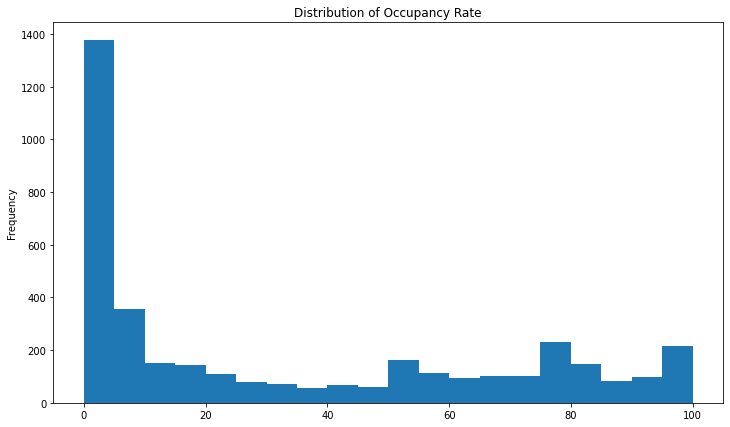

In [45]:
# Get Distribution of occupancy rate
# plt.figure(figsize=(12,7))
plt.rcParams['figure.figsize']=[12,7]
occupancy['rate'].plot(kind='hist', bins=20)
plt.title('Distribution of Occupancy Rate')
plt.show()

Apparently, there are listings with a perfect record i.e. 100% occupancy rate and there are listings with 0% occupancy rates, this latter group represents the majority 

I can further investigate the 0% occupancy especially to ascertain that correctness of this phenomenon, but I will start with the full occupancy group 

I will get a table for all listings with a perfect record.

In [46]:
# Get a table of all listings with a perfect record

perfect_rec = occupancy[occupancy['rate'] == 100]
perfect_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 66 to 3815
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   listing_id  95 non-null     int64  
 1   count       95 non-null     int64  
 2   rate        95 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 3.0 KB


There are 95 listings with a perfect record 

I feel pressured to take a deeper dive to understand the characteristics of this particular group, but before then, I will peruse through the normalized listing DataFrames

##### Isolate Bedtails and Check Occupancy

###### BEDTAILS -- Property Type, Room Type, No of Rooms


In [47]:
# Check bed details 

listings_bedtails.sample(10)

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,amenities,square_feet
674,6412858,House,Entire home/apt,6,2.5,3.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN
3355,7803176,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Pets...",NaN,"{TV,Internet,""Wireless Internet"",Kitchen,""Pets...",NaN
1088,8035212,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN
3331,9595087,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
1925,2919571,Loft,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{Internet,""Wireless Internet"",""Wheelchair Acce...",NaN,"{Internet,""Wireless Internet"",""Wheelchair Acce...",NaN
437,3652434,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Free Parking on...",NaN,"{Internet,""Wireless Internet"",""Free Parking on...",NaN
753,6913414,House,Entire home/apt,6,1.0,2.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN
3245,5930473,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN
2847,6436976,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN
890,7581974,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Washer,Dryer,""Smoke Detec...",NaN,"{""Wireless Internet"",Washer,Dryer,""Smoke Detec...",NaN


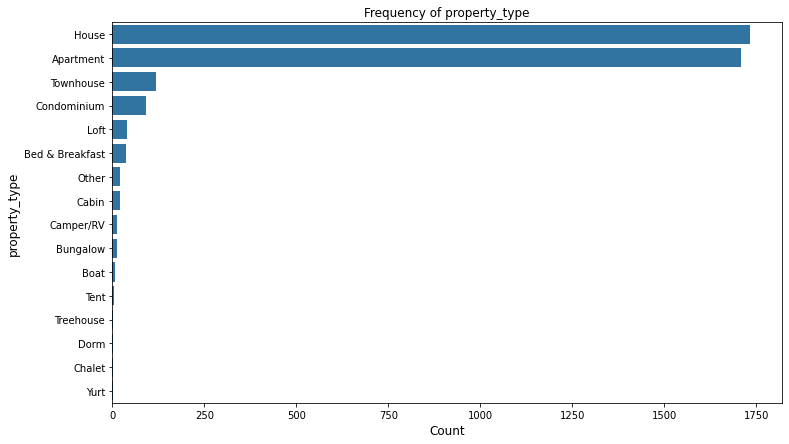

In [48]:

# Plot for Property Type
# Choose color for plot
def count_univ(data, y, color= sns.color_palette()[0]):
    order = data[y].value_counts().index

    sns.countplot(data=data, y=y, color=color, order=order)
    plt.title(f'Frequency of {y}')
    plt.ylabel(f'{y}', fontsize=12)
    plt.xlabel('Count', fontsize=12)
    plt.show()
count_univ(data=listings_bedtails,y='property_type')

Generally, there are more *HOUSES* than any other property type for short stay accommodation in Seattle. Following closely are *APARTMENTS*.

The Margin for error is not known as it's common for owners when uploading listings to use a generic term *'HOUSE'* for the property description



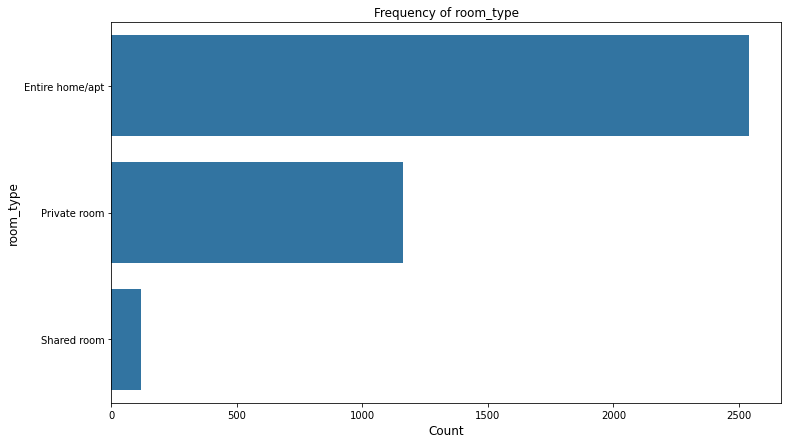

In [49]:
# Plot for Room Type
count_univ(data=listings_bedtails,y='room_type')

As expected there are more listings let out in their entirety than there are shared or private rooms

Next is to check for bedrooms

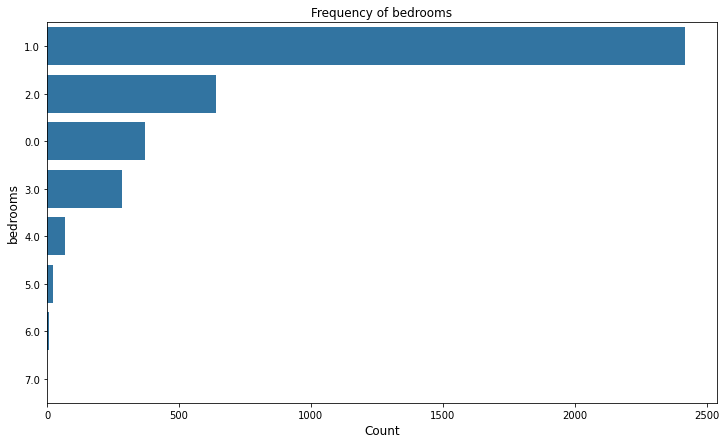

In [50]:
# Plot for Room Type
count_univ(data=listings_bedtails,y='bedrooms')

First thing to note from the visualization is the 0 bedrooms. This could be studio apartment that have both the bedroom and the living area as one single area.

Also, 1-Bedrooms are the most frequent bedroom type, representing majority of the dataset 

Now, merging the listing_bedtails dataframe with my perfect_rec dataframe, I can get the bedroom details for the listings with perfect record and see how they are represented in my perfect_rec dataframe

In [98]:
temp_listings.sample(5)

,listing_id,count,rate,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,amenities,square_feet
38,4550099,365,100.0,4550099,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN
73,8171726,365,100.0,8171726,Apartment,Entire home/apt,8,1.0,4.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN
74,8194886,365,100.0,8194886,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Wheelchair A...",NaN,"{TV,Internet,""Wireless Internet"",""Wheelchair A...",NaN
52,6226666,365,100.0,6226666,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN
59,6706377,365,100.0,6706377,House,Entire home/apt,4,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",Kitchen,""Free Parking on Premis...",NaN,"{TV,""Cable TV"",Kitchen,""Free Parking on Premis...",NaN


In [51]:
# Merge Bed Details with Perfect record
temp_listings = perfect_rec.merge(listings_bedtails, how='left',left_on='listing_id',right_on='id',suffixes=('', '_drop'))

#Drop the duplicate columns
temp_listings.drop([col for col in temp_listings.columns if 'drop' in col], axis=1, inplace=True)




Plot for bedrooms for listings with Perfect Records

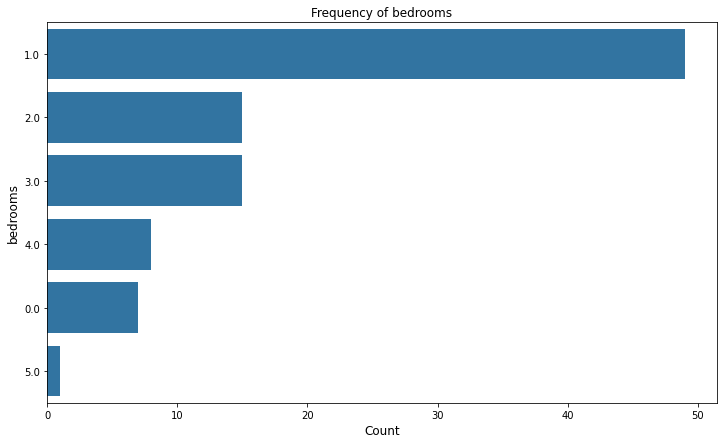

In [52]:
# base_color = sns.color_palette()[0]

# temp_listings.bedrooms.value_counts(normalize=True).plot(kind='bar', color=base_color)
# # plt.xticks(rotation=45)
# temp_listings

# Plot for bedrooms for listings with Perfect Records
count_univ(data=temp_listings,y='bedrooms')

Apart from the fact that there are no 6 or 7 Bedrooms with a Perfect Record. This chart is similar to the one for all listings

It is safe to say that **occupancy rates** ***drop*** as the number of **bedrooms increase**.

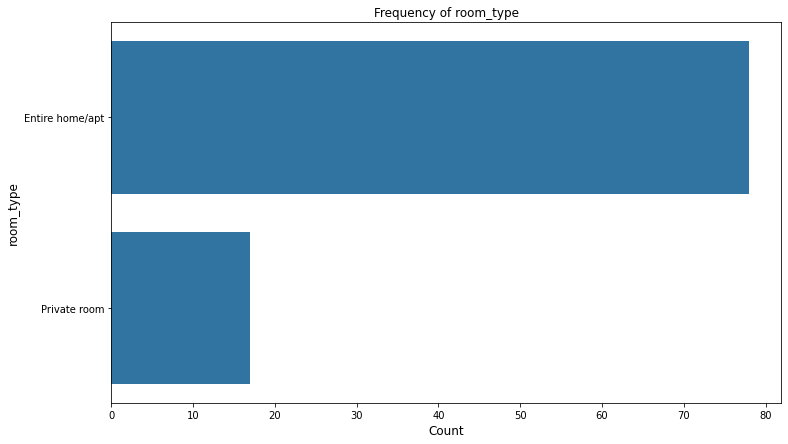

In [53]:
# Plot for Room Type for listings with Perfect Records
count_univ(data=temp_listings,y='room_type')

This is interesting, compared to the chart for all listings, shared apartments have no representation when it comes to having Perfect Records i.e. No Shared Apartment Has A Perfect Record.

For Perfect Records, Listings let out in all their entirety maintain their dominance, they are also generally the most occuring

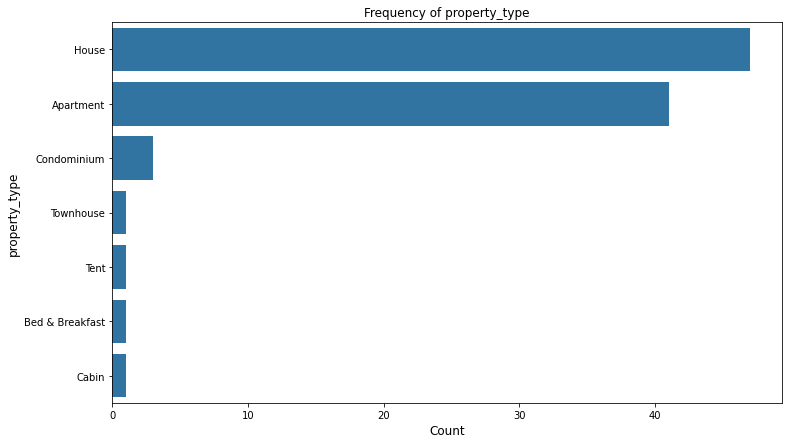

In [54]:
# Plot for Property Type for listings with Perfect Records
count_univ(data=temp_listings,y='property_type')

There is still a gap between the two leading property type.

That is there are still more **Houses** with **Perfect Records** than any other property type for short stay accommodation in Seattle. Following closely are Apartments.

The Margin for error is not known as it's common for owners when uploading to use a generic term 'House' for the property description



In [55]:
# Get Overview of Calendar Dataframe
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [56]:
listings_location.groupby('city')['id'].count()

city
Ballard, Seattle            1
Phinney Ridge Seattle       1
Seattle                  3810
Seattle                     2
West Seattle                2
seattle                     1
西雅图                         1
Name: id, dtype: int64

In [57]:
listings_location.neighbourhood.value_counts()

Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
Pike Market             2
South Park              2
North College Park      1
Fairmount Park          1
Roxhill                 1
Name: neighbourhood, Length: 81, dtype: int64

In [58]:
# Merge listings_location with occupancy 
neighborhood_rate =listings_location.merge(occupancy, how='left', left_on='id',right_on='listing_id',suffixes=('', '_drop'))

#Drop the duplicate columns
neighborhood_rate.drop([col for col in neighborhood_rate.columns if 'drop' in col], axis=1, inplace=True)

neighborhood_rate


,id,name,description,neighbourhood,city,state,is_location_exact,zipcode,market,smart_location,country_code,country,latitude,longitude,listing_id,count,rate
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,Queen Anne,Seattle,WA,t,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,241032,19,5.205479
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,Queen Anne,Seattle,WA,t,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,953595,74,20.273973
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,Queen Anne,Seattle,WA,t,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,3308979,145,39.726027
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,Queen Anne,Seattle,WA,t,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,7421966,222,60.821918
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Queen Anne,Seattle,WA,t,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,278830,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,Fremont,Seattle,WA,t,98107,Seattle,"Seattle, WA",US,United States,47.664295,-122.359170,8101950,333,91.232877
3814,8902327,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,Portage Bay,Seattle,WA,t,98102,Seattle,"Seattle, WA",US,United States,47.649552,-122.318309,8902327,92,25.205479
3815,10267360,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,Seattle,WA,f,98178,Seattle,"Seattle, WA",US,United States,47.508453,-122.240607,10267360,277,75.890411
3816,9604740,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,NaN,Seattle,WA,f,98112,Seattle,"Seattle, WA",US,United States,47.632335,-122.275530,9604740,186,50.958904


In [59]:
# neighborhood_rate.groupby('neighbourhood')['rate'].median().sort_values(ascending=False)

# neighborhood_rate.groupby('neighbourhood').agg({}).sort_values(ascending=False)

In [60]:
listings_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3818 non-null   int64  
 1   price             3818 non-null   float64
 2   weekly_price      2009 non-null   object 
 3   monthly_price     1517 non-null   object 
 4   security_deposit  1866 non-null   object 
 5   cleaning_fee      2788 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 179.1+ KB


##### Isolate Time and Check Occupancy

###### Consider Period a Strong Factor on Occupancy

In [61]:
calendar_df.sample(10)

,listing_id,date,available,price
1303792,1815677,2016-01-16,f,NaN
181298,7151924,2016-09-18,t,$150.00
47252,3303978,2016-06-19,t,$80.00
1107057,3441402,2016-01-16,t,$79.00
465420,8016481,2016-02-18,f,NaN
493576,24212,2016-04-09,f,NaN
177595,6968101,2016-07-27,t,$140.00
1391227,8578490,2016-08-03,t,$65.00
1188086,2737038,2016-01-15,f,NaN
595767,8817033,2016-03-31,t,$66.00


In [62]:
# Convert date column to date datatype
calendar_df['date']= pd.to_datetime(calendar_df['date'], yearfirst=True)

In [63]:
# Extract month 
calendar_df['month'] = calendar_df.date.dt.month

In [64]:
calendar_df.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,1
1,241032,2016-01-05,t,$85.00,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1


In [65]:
# Calculate the Occupancy Count for each month i.e. (where 'available' is 'f')
occupancy_month = calendar_df.groupby('month')['available'].apply(lambda x: (x=='f').sum())

In [66]:
calendar_df

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,1
1,241032,2016-01-05,t,$85.00,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1
...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,12
1393566,10208623,2016-12-30,f,NaN,12
1393567,10208623,2016-12-31,f,NaN,12
1393568,10208623,2017-01-01,f,NaN,1


In [67]:
occupancy_month

month
1     49603
2     37401
3     34420
4     38503
5     38387
6     37296
7     44136
8     42011
9     37294
10    35920
11    32760
12    31297
Name: available, dtype: int64

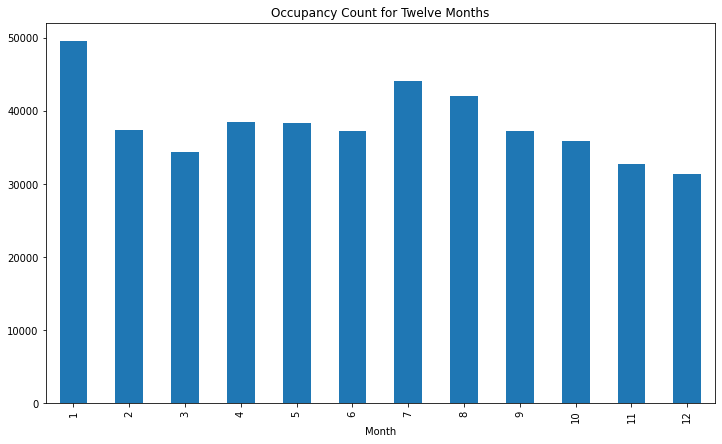

In [68]:
occupancy_month.plot(kind='bar')
plt.title('Occupancy Count for Twelve Months')
plt.xlabel('Month');

The Months 1, 7 and 8 which represent **January**, **July** & **August** are the top performing Months in Seattle with with the highest Occupancy count 

In [69]:
calendar_df

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,1
1,241032,2016-01-05,t,$85.00,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1
...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,12
1393566,10208623,2016-12-30,f,NaN,12
1393567,10208623,2016-12-31,f,NaN,12
1393568,10208623,2017-01-01,f,NaN,1


In [70]:
listings_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [71]:
listings_review.sample(10)

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
2121,1872885,5,2014-12-01,2015-12-13,100.0,9.0,9.0,10.0,9.0,9.0,9.0
1591,7431247,1,2015-08-15,2015-08-15,100.0,10.0,10.0,10.0,10.0,8.0,8.0
936,9506766,2,2015-11-23,2015-12-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2656,9137075,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126,7844444,6,2015-08-20,2015-09-01,73.0,6.0,6.0,9.0,9.0,9.0,7.0
2307,3849918,8,2015-06-12,2015-09-21,85.0,8.0,9.0,9.0,10.0,8.0,8.0
2612,890677,55,2013-02-11,2015-11-01,98.0,10.0,10.0,10.0,10.0,10.0,10.0
2559,9519968,4,2015-12-17,2016-01-03,80.0,8.0,7.0,8.0,8.0,8.0,8.0
2037,9562586,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2678,7580593,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# listing price
listings_price

,id,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,241032,85.0,NaN,NaN,NaN,NaN
1,953595,150.0,"$1,000.00","$3,000.00",$100.00,$40.00
2,3308979,975.0,NaN,NaN,"$1,000.00",$300.00
3,7421966,100.0,$650.00,"$2,300.00",NaN,NaN
4,278830,450.0,NaN,NaN,$700.00,$125.00
...,...,...,...,...,...,...
3813,8101950,359.0,NaN,NaN,NaN,$230.00
3814,8902327,79.0,NaN,NaN,$500.00,$50.00
3815,10267360,93.0,$450.00,NaN,$250.00,$35.00
3816,9604740,99.0,NaN,NaN,$300.00,$45.00


#### Host Analysis


Does any activity of the host affect the occupancy? 
* Does the response rate and time affect the occupancy?


In [108]:
listings_hosts.host_response_time.value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

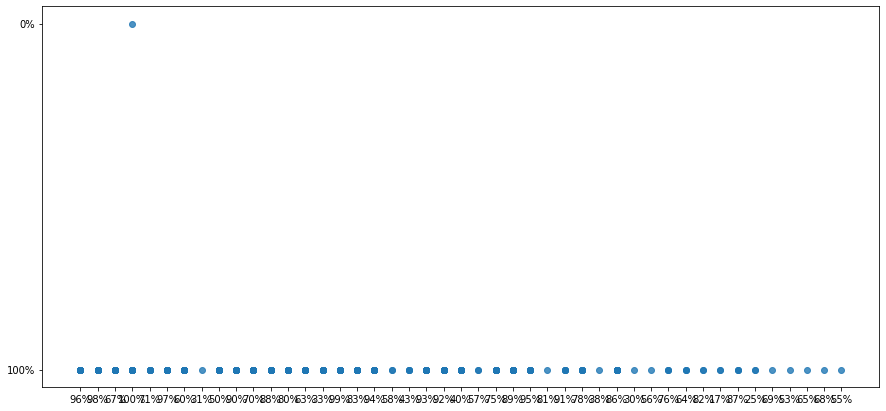

In [104]:
x= listings_hosts.host_response_rate.values
y = listings_hosts.host_acceptance_rate.values


sns.regplot(data=listings_hosts,x=x,y=y)

plt.title(f'Relationship between {x} and {y}', fontsize=8)
plt.xlabel(f'{x}')
plt.ylabel(f'{y}')

##### Isolate Price and Check Occupancy

###### Use a price range

In [73]:
# Merge listings_location with occupancy 
price_rate = listings_price.merge(occupancy, how='left', left_on='id',right_on='listing_id',suffixes=('', '_drop'))

#Drop the duplicate columns
price_rate.drop([col for col in price_rate.columns if 'drop' in col], axis=1, inplace=True)
price_rate

,id,price,weekly_price,monthly_price,security_deposit,cleaning_fee,listing_id,count,rate
0,241032,85.0,NaN,NaN,NaN,NaN,241032,19,5.205479
1,953595,150.0,"$1,000.00","$3,000.00",$100.00,$40.00,953595,74,20.273973
2,3308979,975.0,NaN,NaN,"$1,000.00",$300.00,3308979,145,39.726027
3,7421966,100.0,$650.00,"$2,300.00",NaN,NaN,7421966,222,60.821918
4,278830,450.0,NaN,NaN,$700.00,$125.00,278830,0,0.000000
...,...,...,...,...,...,...,...,...,...
3813,8101950,359.0,NaN,NaN,NaN,$230.00,8101950,333,91.232877
3814,8902327,79.0,NaN,NaN,$500.00,$50.00,8902327,92,25.205479
3815,10267360,93.0,$450.00,NaN,$250.00,$35.00,10267360,277,75.890411
3816,9604740,99.0,NaN,NaN,$300.00,$45.00,9604740,186,50.958904


In [74]:
# price_rate.loc[price_rate['price'].between(0,100, 'both'), 'range'] = '0-100'

In [75]:
# Define bins & labels
bins = [0,100,200,300,400,500,600,700,800,900,1000]
labels = ['A', 'B', "C", 'D', 'E', 'F', 'G','H','I', 'J']

In [76]:
price_rate['range'] = pd.cut(x=price_rate.price, bins=bins, labels=labels)
price_rate.head(-4)

,id,price,weekly_price,monthly_price,security_deposit,cleaning_fee,listing_id,count,rate,range
0,241032,85.0,NaN,NaN,NaN,NaN,241032,19,5.205479,A
1,953595,150.0,"$1,000.00","$3,000.00",$100.00,$40.00,953595,74,20.273973,B
2,3308979,975.0,NaN,NaN,"$1,000.00",$300.00,3308979,145,39.726027,J
3,7421966,100.0,$650.00,"$2,300.00",NaN,NaN,7421966,222,60.821918,A
4,278830,450.0,NaN,NaN,$700.00,$125.00,278830,0,0.000000,E
...,...,...,...,...,...,...,...,...,...,...
3809,6120046,120.0,$600.00,"$2,200.00",NaN,$75.00,6120046,0,0.000000,B
3810,262764,154.0,"$1,120.00","$5,500.00",$150.00,$85.00,262764,138,37.808219,B
3811,8578490,65.0,NaN,NaN,NaN,$20.00,8578490,144,39.452055,A
3812,3383329,95.0,$600.00,"$2,200.00",$500.00,NaN,3383329,78,21.369863,A


In [77]:
# price_rate.query()
price_rate[price_rate['range']=='I'].head(20)

,id,price,weekly_price,monthly_price,security_deposit,cleaning_fee,listing_id,count,rate,range
1279,4464824,899.0,"$5,499.00","$14,900.00",NaN,$159.00,4464824,3,0.821918,I


<AxesSubplot:xlabel='range'>

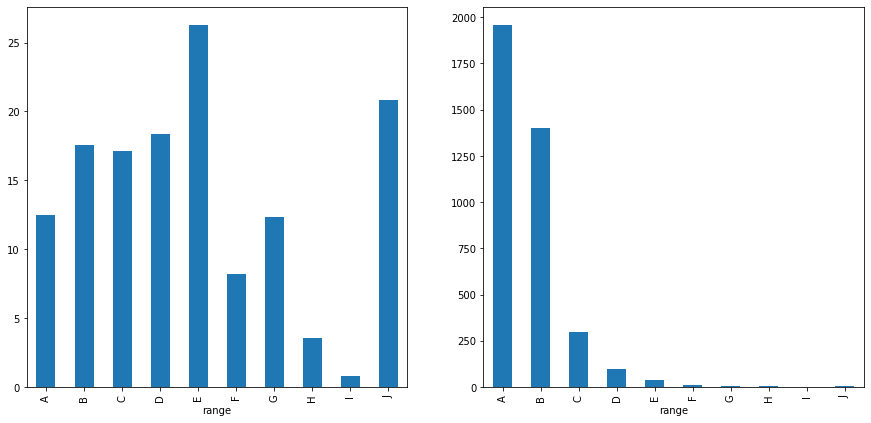

In [95]:
# find the median occupanncy rate group by price range

plt.rcParams['figure.figsize']=[15, 7]

plt.subplot(1,2,1)

price_rate.groupby(['range'])['rate'].median().plot(kind='bar')

plt.subplot(1,2,2)

price_rate.groupby(['range'])['id'].count().plot(kind='bar')

In [96]:
price_rate.head(10)

,id,price,weekly_price,monthly_price,security_deposit,cleaning_fee,listing_id,count,rate,range
0,241032,85.0,NaN,NaN,NaN,NaN,241032,19,5.205479,A
1,953595,150.0,"$1,000.00","$3,000.00",$100.00,$40.00,953595,74,20.273973,B
2,3308979,975.0,NaN,NaN,"$1,000.00",$300.00,3308979,145,39.726027,J
3,7421966,100.0,$650.00,"$2,300.00",NaN,NaN,7421966,222,60.821918,A
4,278830,450.0,NaN,NaN,$700.00,$125.00,278830,0,0.000000,E
5,5956968,120.0,$800.00,NaN,NaN,$40.00,5956968,63,17.260274,B
6,1909058,80.0,$575.00,NaN,$150.00,NaN,1909058,19,5.205479,A
7,856550,60.0,$360.00,NaN,$150.00,$25.00,856550,265,72.602740,A
8,4948745,90.0,$500.00,"$1,700.00",NaN,NaN,4948745,24,6.575342,A
9,2493658,150.0,"$1,000.00","$3,000.00",$100.00,$40.00,2493658,41,11.232877,B


In [ ]:
plt.subplots(figsize=[11,8])
plt.subplot(2,1,1)
sns.barplot(data=loans_df,x='LoanStatus',y='BorrowerRate',hue='Term')
plt.xticks(rotation=45)
plt.legend(loc=0, ncol=3)
plt.show()

<AxesSubplot:ylabel='Frequency'>

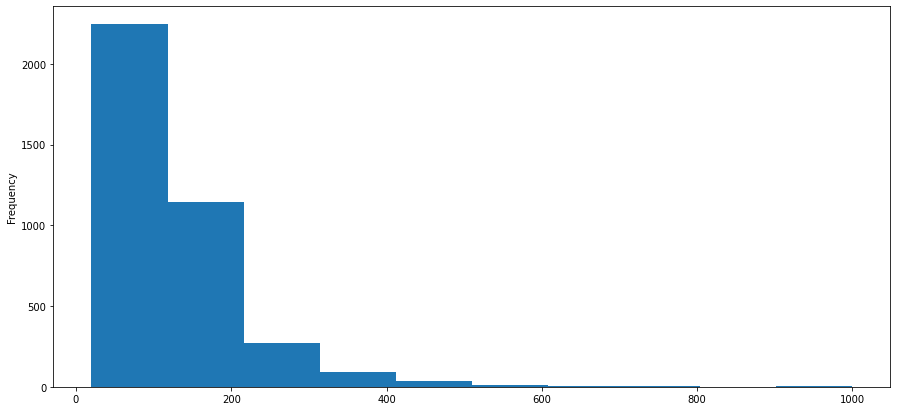

In [93]:
price_rate['price'].plot(kind='hist')

The histogram is positively skewed and shows that the most of the distribution falls in the lower boundary. 
There are more short stays with lower price boundary. 

Text(0.5, 1.0, 'Relationship between [ 85. 150. 975. ...  93.  99.  87.] and [ 5.20547945 20.2739726  39.7260274  ... 75.89041096 50.95890411\n 98.08219178]')

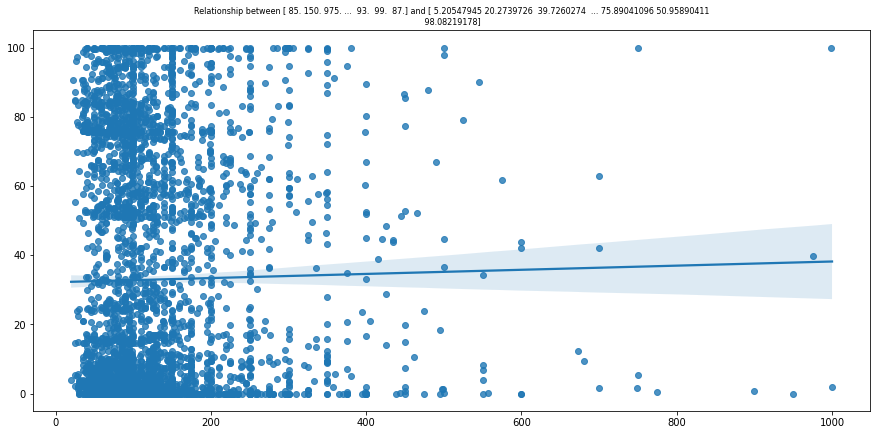

In [79]:
# plot relationship

data = price_rate
x = price_rate.price.values
y = price_rate.rate.values

plt.rcParams['figure.figsize']=[15, 7]
sns.regplot(data=data,x=x,y=y)
plt.title(f'Relationship between {x} and {y}', fontsize=8)
# plt.xlabel(f'{x}')
# plt.ylabel(f'{y}')
    

In [ ]:
Host 